## ARIMAX와 GC Test 결과를 바탕으로 ETF 종목 클러스터링

- x축 : ARIMAX Test에서의 p-value 값
- y축 : GC Test에서의 p <= 0.05인 창의 개수
### 필요한 라이브러리 불러오기

In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (Windows 환경)
plt.rc('font', family='AppleGothic')  # 말굽고딕 폰트를 사용
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 폰트 깨짐 방지

# 파일 불러오기
file_path = '/Users/taekyounglee/Documents/projects/Finance_Project_COVID19_ETF/data/Total_Result.xlsx' 
total_data = pd.ExcelFile(file_path)



### 클러스터링

In [21]:
# 필요한 컬럼들만 추출 (X축은 'p <= 0.05', Y축은 'p-value')
cluster_data = total_df[['p <= 0.05', 'p-value']]

# 결측값 제거
cluster_data = cluster_data.dropna()

# KMeans 클러스터링을 위해 데이터 표준화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# KMeans 모델로 클러스터링
kmeans = KMeans(n_clusters=12, random_state=0)
clusters = kmeans.fit_predict(scaled_data)

# 클러스터 결과를 원본 데이터에 추가
total_df['Cluster'] = clusters

# 강조하고 싶은 ETF와 Exogenous Variable 리스트(ARIMAX에서 p-value가 낮게 나온 섹터 및 외생변수)
highlight_pairs = [
    ('TIGER200_커뮤니케이션서비스', 'decideCnt_diff_perc'),
    ('KODEX_헬스케어_TI', 'decideCnt_diff_perc'),
    ('TIGER_은행', 'deathCnt_diff_perc'),
    ('TIGER_증권', 'decideCnt_diff_perc'),
    ('KODEX_보험_TI', 'decideCnt_diff_perc'),
    ('KODEX_증권_TI', 'decideCnt_diff_perc'),
    ('TIGER200_IT', 'deathCnt_diff_perc'),
    ('KODEX_은행_TI', 'deathCnt_diff_perc')
]


### 결과 시각화

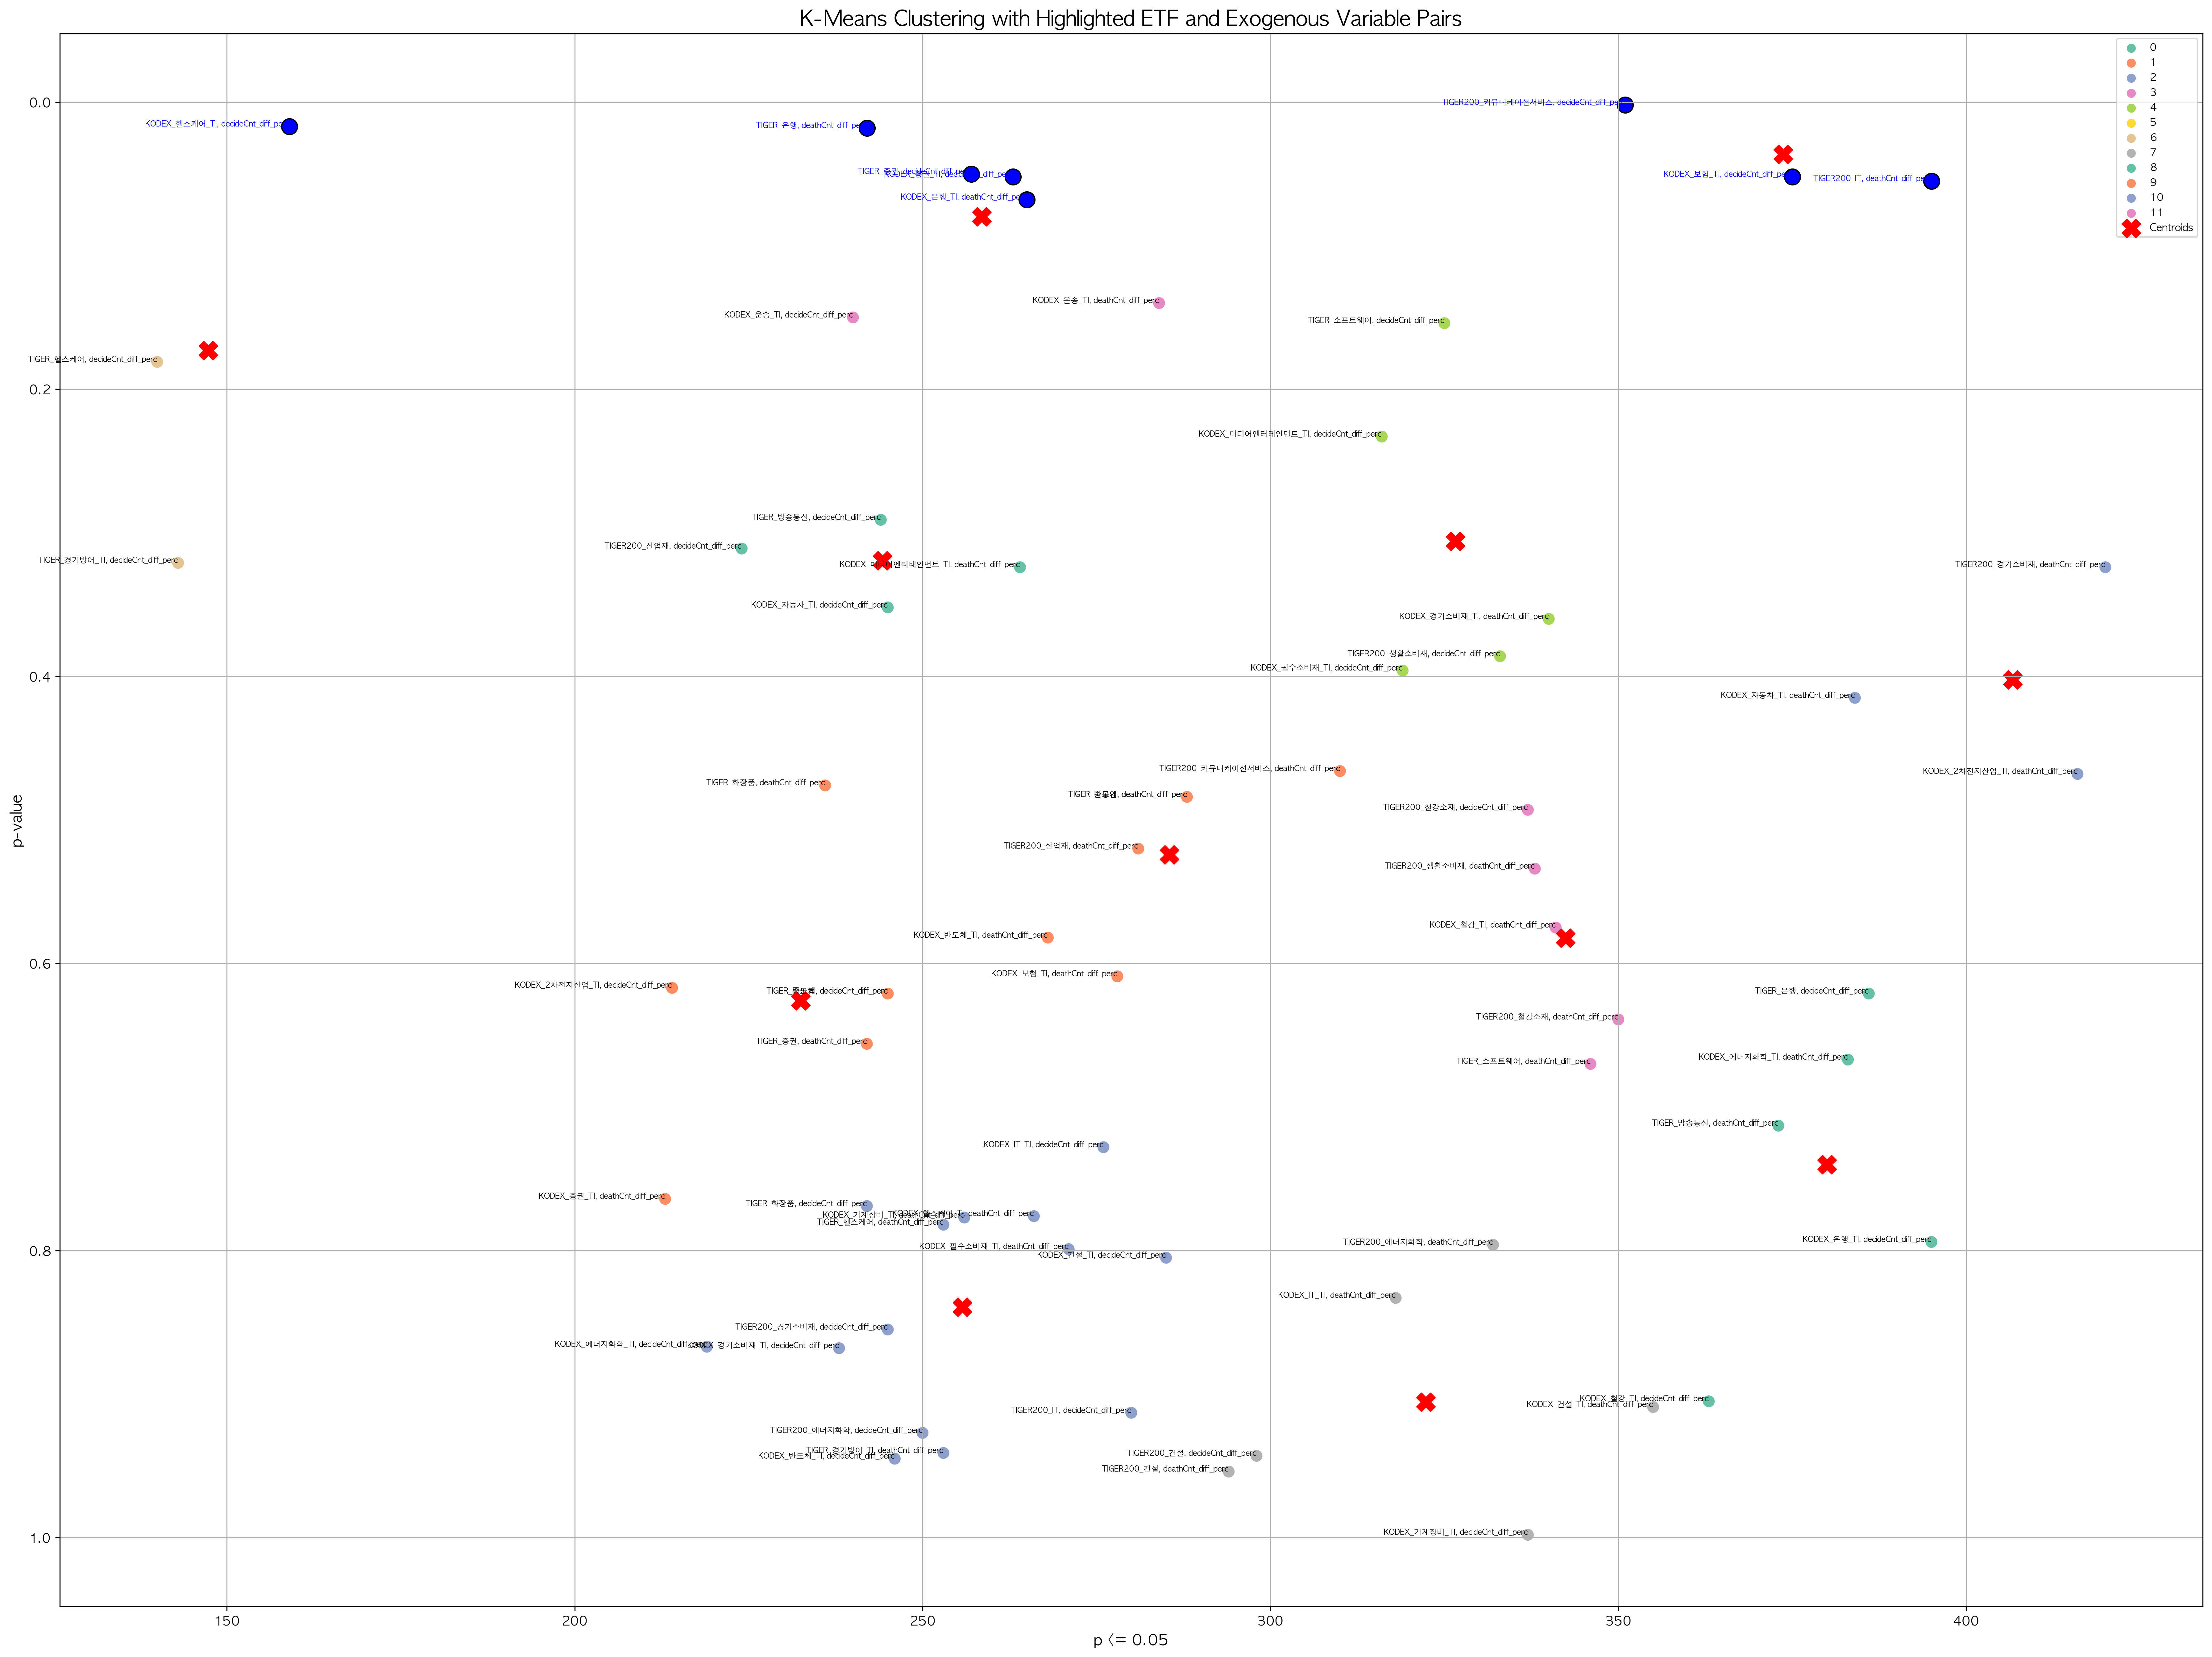

In [22]:

# 클러스터링 결과 시각화
plt.figure(figsize=(24, 18), dpi=300) 
scatter_plot = sns.scatterplot(x='p <= 0.05', y='p-value', hue='Cluster', data=total_df, palette='Set2', s=100)

# 클러스터 중심 표시
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centroids')

# 각 점에 ETF와 Exogenous Variable 라벨 추가
for i in range(total_df.shape[0]):
    etf_label = f"{total_df['ETF'][i]}, {total_df['Exogenous Variable'][i]}"
    
    # 강조하고 싶은 ETF와 Exogenous Variable 조합은 다른 색상으로 표시
    if (total_df['ETF'][i], total_df['Exogenous Variable'][i]) in highlight_pairs:
        plt.text(total_df['p <= 0.05'][i], total_df['p-value'][i], etf_label, 
                 fontsize=6, ha='right', color='blue', weight='bold')  # 글자 크기를 줄임
        plt.scatter(total_df['p <= 0.05'][i], total_df['p-value'][i], color='blue', s=150, edgecolor='black', label=etf_label if i == 0 else "")
    else:
        plt.text(total_df['p <= 0.05'][i], total_df['p-value'][i], etf_label, fontsize=6, ha='right')  # 글자 크기를 줄임

# y축 반전
plt.gca().invert_yaxis()

plt.title('K-Means Clustering with Highlighted ETF and Exogenous Variable Pairs', fontsize=16)
plt.xlabel('p <= 0.05', fontsize=12)
plt.ylabel('p-value', fontsize=12)
plt.legend(loc='upper right', fontsize=8)  # 범례 위치와 크기 조정
plt.grid(True)
plt.tight_layout()  # 레이아웃을 자동으로 조정하여 겹침 방지
plt.show()
